# Fall 2025 Final Laboratory Exam - Pump Curve

:::{admonition} Course Website
[http://54.243.252.9/ce-3105-webroot/](http://54.243.252.9/ce-3105-webroot/)
:::

This laboratory determines performance characteristics of a small pump in various flow configurations.

## Readings

1. [Holman, J.P., (2012) Experimental Methods for Engineers, 8th Ed. (Chapters 5,6, and 10)](https://mech.at.ua/HolmanICS.pdf)


**General Readings about Pumps**

1. [Pump Selection](http://54.243.252.9/ce-3105-webroot/ce3105notes/lessons/laboratory7/PumpSelection.pdf)
2. [Pump Suction Conditions](http://54.243.252.9/ce-3105-webroot/ce3105notes/lessons/laboratory7/PumpSuctionConditions.pdf)
3. [Net Positive Suction Head](http://54.243.252.9/ce-3105-webroot/ce3105notes/lessons/laboratory7/NPSH-Explain.pdf)
4. [Pumps and Lift Stations (excerpt from Water Systems Design)](http://54.243.252.9/ce-3105-webroot/ce3105notes/lessons/laboratory7/Lecture06.pdf)
5. [Submersible Lift Stations Design (City of Houston Manual)](http://54.243.252.9/ce-3105-webroot/ce3105notes/lessons/laboratory7/2011_coh_design_manual_submersible_lift_stations.pdf)
6. [FHWA Lift Station Design](http://54.243.252.9/ce-3105-webroot/ce3105notes/lessons/laboratory7/FHWA-NHI-01-007-LiftStationDesign.pdf)

<!--9. [Laboratory 7 Example Report](http://54.243.252.9/ce-3105-webroot/2-Exercises/laboratory7/Goby7.pdf)-->

### Objective
To experimentally determine the relationship between discharge (Q), head (H), and power input (P) for a small DC pump operating at variable discharge elevations. Students will produce a pump curve (H vs Q) and evaluate power consumption.

#### Background
A pump curve is a graph showing how the head (H) produced by a pump varies with flow rate (Q).

**Key Concepts:**
- Total Dynamic Head (TDH) is approximated here by the vertical height from pump to discharge.
- Flow Rate (Q) is measured in L/min from the flow meter.
- Electrical power input (P) for the DC pump is computed using:
$$ P = V \times I $$ 
  where V is voltage and I is current.

- (Optional) Efficiency can be estimated by:
  
  $$ \eta = \frac{\rho g Q H}{P} $$
  where $ \rho $ is water density and $ g $ is gravity.

- Modified Bernouli Equation:

$$ \frac{p_1}{\rho g} + \frac{v_1^2}{2g} + z_1 + h_p = \frac{p_2}{\rho g} + \frac{v_2^2}{2g} + z_2 + f\frac{L}{D}\frac{V^2}{2g}$$

For constant diameter pipeline, and discharge into the atmosphere the equation becomes

$$ h_p = (z_2 - z_1) + f\frac{L}{D}\frac{V^2}{2g}$$

The velocity is determined from the measured flowrate and pipeline inside diameter.  If expressed in discharge form (for circular conduits)

$$ h_p(Q) = (z_2 - z_1) + 8fL\frac{Q^2}{\pi^2 g D^5}$$

- Reynolds' Number:

To determine $f$ the Reynolds' number is needed:

$$Re_D(Q)=\frac{4 \rho Q  }{\mu \pi D}$$

- Friction factor:

The friction factor can be approximated using:

$$f = \frac{0.25}{[log_{10}(\frac{\frac{k_s}{D}}{3.7}+\frac{5.74}{Re_d^{0.9}})]^2}$$

- Roughness height $k_s$

The roughness height is found using [Roughness Height Database](http://54.243.252.9/toolbox/Databases/RoughnessHeight/RoughnessHeight.html) or other suitable literature reference.

### Apparatus

The experimental set-up is comprised of:
- 5.5V DC pump
- Variable power supply (current limited)
- Flexible discharge pipe (I.D. = 0.3 inches)
- Ruler or measuring tape
- Water container
- Stopwatch

An image of the system in operation is shown below

![](IMG_2975.jpg)

The current-limited power supply is visible on the left; flow is determined by time-to-fill.  The discharge outlet can be moved to different locations above the supply tank to produce a pump curve.  There is considerable splash and overflow, so a hose (not pictured) is used to keep the orange tank always full, ensuring a constant head at the supply location.

### Experimental Setup
1. Connect pump to water reservoir.
2. Attach flexible pipe.
3. Elevate discharge outlet to different known heights.
4. Measure V, I, Q, and elevation H.

The figure below is a close-up of the power supply. In the figure the voltage is read from the left display, and current from the right display.  The current can be limited by the experimenter - in current limited conditions a small red indicator appears in the display.

![](IMG_2976.jpg)

Discharge is measured using a bucket and time-to-fill.

### Procedure
1. Fix power supply voltage (5.5V).
2. Set current limiter to 0.0 A then slowly increase until flow begins
3. Begin with lowest discharge height.
4. Record:
   - Voltage (V)
   - Current (I)
   - Flow Rate (Q)
   - Height (H)
5. Repeat for multiple heights.

In [1]:
import pandas as pd

# Data table template
data = pd.DataFrame({
    'Trial': [1, 2, 3, 4, 5],
    'Voltage (V)': [None]*5,
    'Current (A)': [None]*5,
    'Flow Rate Q (L/min)': [None]*5,
    'Head H (m)': [None]*5,
    'Power Input P (W)': [None]*5
})
data

,Trial,Voltage (V),Current (A),Flow Rate Q (L/min),Head H (m),Power Input P (W)
0,1,None,None,None,None,None
1,2,None,None,None,None,None
2,3,None,None,None,None,None
3,4,None,None,None,None,None
4,5,None,None,None,None,None


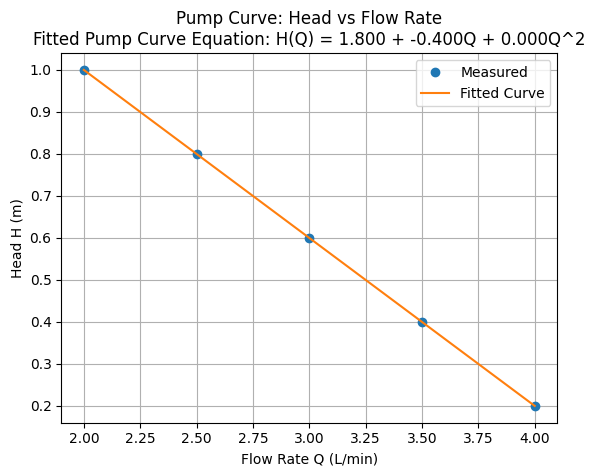

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Sample data entry (replace with your measurements)
Q = np.array([4, 3.5, 3, 2.5, 2])  # L/min
H = np.array([0.2, 0.4, 0.6, 0.8, 1.0])  # meters

# Fit a 2nd-degree polynomial
coefs = Polynomial.fit(Q, H, 2).convert().coef
#print(f"Fitted Pump Curve Equation: H(Q) = {coefs[0]:.3f} + {coefs[1]:.3f}Q + {coefs[2]:.3f}Q^2")
addtitle = f"Fitted Pump Curve Equation: H(Q) = {coefs[0]:.3f} + {coefs[1]:.3f}Q + {coefs[2]:.3f}Q^2"
# Plot
Q_fit = np.linspace(min(Q), max(Q), 100)
H_fit = coefs[0] + coefs[1]*Q_fit + coefs[2]*Q_fit**2

plt.figure()
plt.plot(Q, H, 'o', label='Measured')
plt.plot(Q_fit, H_fit, '-', label='Fitted Curve')
plt.xlabel('Flow Rate Q (L/min)')
plt.ylabel('Head H (m)')
plt.title('Pump Curve: Head vs Flow Rate\n' + addtitle)
plt.legend()
plt.grid(True)
plt.show()


### Discussion Questions
1. How does head change as flow rate increases?
2. How does power consumption relate to flow rate?
3. Would this pump be suitable for a head requirement of 1.2 m?
4. What measurement errors may affect your results?
<!-- 5. How would pipe friction affect the pump curve in real systems? -->

## Deliverables
- Completed data table
- Graphs (H vs Q and optionally P vs Q)
- Fitted pump curve equation
- Answers to discussion questions